In [1]:
import os
import cv2
import sys
from matplotlib import pyplot as plt
sys.path.append("../")
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from run_tesseract import PROJECT_DIR, PARENT_DIR, RAW_COMMENTARY_DIRS, TRAIN_COMMENTARY_DIRS, TESSDATA_DIR, TESSDATA_BEST_DIR, POGRETRA_COMMENTARY_DIRS
from run_tesseract import test_ocr, train, get_fig_idxs, show_fig, batch_ocr, train, clean_data_tesstrain, check_missing_gt, clean_gt_folder, test_ocr_raw
from preprocess import toolbox

In [3]:
dir_map = {
    "raw": RAW_COMMENTARY_DIRS,
    "train": TRAIN_COMMENTARY_DIRS,
    "pogretra": sorted(POGRETRA_COMMENTARY_DIRS),
}
print(RAW_COMMENTARY_DIRS)
print(TRAIN_COMMENTARY_DIRS)
print(dir_map["pogretra"])

['Wecklein1894', 'Kamerbeek1953', 'sophoclesplaysa05campgoog', 'Paduano1982', 'lestragdiesdeso00tourgoog', 'Untersteiner1934', 'Ferrari1974', 'sophokle1v3soph', 'DeRomilly1976', 'Finglass2011', 'Colonna1975', 'bsb10234118', 'cu31924087948174', 'Garvie1998']
['Wecklein1894', 'sophoclesplaysa05campgoog', 'bsb10234118', 'sophokle1v3soph', 'cu31924087948174']
['German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux', 'German-serifs/actaphilippietac00bonnuoft', 'German-serifs/b21459162_0003', 'German-serifs/bsb10234118', 'German-serifs/bub_gb_FZbfaq7tcvAC', 'German-serifs/churchfathers', 'German-serifs/ldpd_10922736_000', 'German-serifs/platonisdialogi06plat', 'German-serifs/stoicorumveterum02arniuoft', 'Old-Teubner-serif/602250676brucerob', 'Old-Teubner-serif/Teubner-serif-training', 'Old-Teubner-serif/aeschinisoration00aesc', 'Old-Teubner-serif/deanimaliumantur02aeliuoft', 'Old-Teubner-serif/inplatonisrempu02krolgoog_teubner_serif', 'Old-Teubner-serif/poetaeminoresgra02gais'

In [29]:
mode="pogretra" # choose from 'train' and 'raw' and 'pogretra'
commentary_name = dir_map[mode][0]
cleaned=False
print(commentary_name)

German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux


In [30]:
avail_figs = get_fig_idxs(commentary_name, mode=mode, cleaned=cleaned, verbose=True)

Total img count: 594
too many images. only showing the first 100 and last 100.
['nnc1.50178386-1593613693_0010_0.png', 'nnc1.50178386-1593613693_0010_1.png', 'nnc1.50178386-1593613693_0010_10.png', 'nnc1.50178386-1593613693_0010_11.png', 'nnc1.50178386-1593613693_0010_12.png', 'nnc1.50178386-1593613693_0010_13.png', 'nnc1.50178386-1593613693_0010_14.png', 'nnc1.50178386-1593613693_0010_15.png', 'nnc1.50178386-1593613693_0010_16.png', 'nnc1.50178386-1593613693_0010_17.png', 'nnc1.50178386-1593613693_0010_18.png', 'nnc1.50178386-1593613693_0010_19.png', 'nnc1.50178386-1593613693_0010_2.png', 'nnc1.50178386-1593613693_0010_20.png', 'nnc1.50178386-1593613693_0010_21.png', 'nnc1.50178386-1593613693_0010_22.png', 'nnc1.50178386-1593613693_0010_23.png', 'nnc1.50178386-1593613693_0010_24.png', 'nnc1.50178386-1593613693_0010_25.png', 'nnc1.50178386-1593613693_0010_26.png', 'nnc1.50178386-1593613693_0010_3.png', 'nnc1.50178386-1593613693_0010_4.png', 'nnc1.50178386-1593613693_0010_5.png', 'nnc1.

In [60]:
fig_idx = avail_figs[258]
print(fig_idx)

nnc1.50178386-1593613693_0024_5.png


### preprocessing

Pogretra
- German-serifs/actaphilippietac00bonnuoft/actaphilippietac00bonnuoft_0019_28.png
- use erosion np.ones((3,3))
- use opening cross_kernel(3)

### finetuning

Train
- bsb10234118/bsb10234118_0042_32.png
- use "eng+fra+finetune-grc-pogretra" vs "eng+fra+grc"

### challenge

Bad preprocessing: Pogretra
- German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux/nnc1.50178386-1593613693_0024_5.png
- use erosion np.ones((3,3))
- use opening cross_kernel(3)

In [61]:
img = show_fig(commentary_name, fig_idx, mode=mode, cleaned=cleaned)

In [62]:
noise_img = toolbox.add_noise(img, "gaussian", show_fig=True)

In [63]:
preprocessed_img = toolbox.preprocess_img(img)
for tmp_img in preprocessed_img:
    plt.figure()
    plt.imshow(tmp_img[1], cmap='gray')
    # plt.title(tmp_img[0])
    plt.axis("off")

In [64]:
out1 = test_ocr_raw("original", TESSDATA_BEST_DIR, img, "original_img", lang="eng+fra+grc", save=True, viz=False)

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_23-01-20_original/original_img.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_23-01-20_original/original_img.hocr
OCR output:
χρήσασϑαι ἀνδρί. ἐὰν σώφρων ἢ τις, καὶ φιλανϑρωπος γενέσϑαι



In [65]:
out2 = test_ocr_raw("original-finetune", TESSDATA_BEST_DIR, img, "original_img", lang="eng+fra+finetune-grc-pogretra", save=True, viz=False)

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_23-01-22_original-finetune/original_img.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_23-01-22_original-finetune/original_img.hocr
OCR output:
χρήσασθαι ἀνδρί. ἐὰν σώφρων ῇ Tig, καὶ φιλάνθρωπος γενέσθαι



In [66]:
out5 = test_ocr_raw("preprocessing", TESSDATA_BEST_DIR, preprocessed_img[-1][1], "preprocess_img", lang="eng+fra+grc", save=False, viz=False)

OCR output:



In [40]:
out6 = test_ocr_raw("preprocessing", TESSDATA_BEST_DIR, preprocessed_img[-1][1], "preprocess_img", lang="eng+fra+grc+finetune-grc-pogretra", save=False, viz=False)

OCR output:
ὃ καρπὸρ τῆς ἀσφαλείας μέχρι τοῦ δεῦρο φαίνεται. τὸν γὰρ αὐτὸν



In [53]:
out3 = test_ocr_raw("noise", TESSDATA_BEST_DIR, noise_img, "noise_img", lang="eng+fra+grc", save=True, viz=False)

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_13-49-20_noise/noise_img.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_13-49-20_noise/noise_img.hocr
OCR output:



In [54]:
out4 = test_ocr_raw("noise-finetune", TESSDATA_BEST_DIR, noise_img, "noise_img", lang="eng+fra+finetune-grc-pogretra", save=True, viz=False)

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_13-49-32_noise-finetune/noise_img.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_13-49-32_noise-finetune/noise_img.hocr
OCR output:



string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/05-04-2022_14-43-28_test/ldpd_10922736_000_0008_0.png.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/05-04-2022_14-43-28_test/ldpd_10922736_000_0008_0.png.hocr


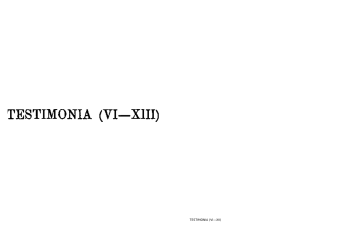

OCR output:
TESTIMONIA (VI—XII)



'TESTIMONIA (VI—XII)\n'

In [11]:
test_ocr("test", TESSDATA_DIR, commentary_name, fig_idx, lang="eng+fra+grc", mode=mode, save=True, cleaned=cleaned)

In [13]:
batch_ocr("test", TESSDATA_DIR, commentary_name, "eng+fra+grc", mode=mode, save=True, viz=False, verbose=False, cleaned=cleaned)

100%|██████████| 524/524 [1:27:37<00:00, 10.03s/it]


In [12]:
train("finetune-grc-pogretra", POGRETRA_COMMENTARY_DIRS, mode, TESSDATA_BEST_DIR, config_file=os.path.join(PROJECT_DIR, "ocr", "tesstrain_configs", "finetune.yaml"), cleaned=False)

See /scratch/students/zzhao/code/ts/tesstrain/log-08-04-2022_02-28-15.txt for the training output.
make training MODEL_NAME=finetune-grc-pogretra DATA_DIR=/scratch/students/zzhao/code/ts/tessdata_best GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/ldpd_10922736_000 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/platonisdialogi06plat GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/actaphilippietac00bonnuoft GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bsb10234118 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/stoicorumveterum02arniuoft GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bub_gb_FZbfaq7tcvAC GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/

tee: 'standard output': No space left on device


In [ ]:
# remove .box and .lstmf files from the dataset
clean_data_tesstrain(commentary_name, mode="train", cleaned=True)

In [ ]:
# check if there is any bad ground truth files inside the dataset
check_missing_gt(commentary_name, mode="train", cleaned=False)

In [ ]:
# create a new dataset and only include files with valid ground truth
clean_gt_folder(commentary_name, mode="train")